In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import koreanize_matplotlib
import plotly.express as px
import folium
import json
import re
import geopandas as gpd
import plotly.offline as pyo
pyo.init_notebook_mode()

In [72]:
plt.rcParams['font.family'] = 'NanumGothic'  # 사용할 한글 폰트명을 지정

In [3]:
bicycle = pd.read_csv("bicycle.csv", encoding='cp949')

In [4]:
bicycle_2 = pd.read_csv("bicycle_2.csv", encoding='cp949')

In [119]:
bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3601047 entries, 0 to 3601046
Data columns (total 12 columns):
 #   Column   Dtype  
---  ------   -----  
 0   대여일자     object 
 1   대여시간     int64  
 2   대여소번호    int64  
 3   대여소명     object 
 4   대여구분코드   object 
 5   성별       object 
 6   연령대코드    object 
 7   이용건수     int64  
 8   운동량      object 
 9   탄소량      object 
 10  이동거리(M)  float64
 11  이용시간(분)  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 329.7+ MB


In [120]:
bicycle_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2753 entries, 0 to 2752
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   대여소번호      2749 non-null   float64
 1   보관소(대여소)명  2749 non-null   object 
 2   자치구        2749 non-null   object 
 3   상세주소       2749 non-null   object 
 4   위도         2749 non-null   float64
 5   경도         2749 non-null   float64
 6   설치시기       2749 non-null   object 
 7   lcd거치대수    1315 non-null   float64
 8   qr거치대수     1582 non-null   float64
 9   설치형태       2749 non-null   object 
dtypes: float64(5), object(5)
memory usage: 215.2+ KB


In [121]:
bicycle.describe()

대여시간         대여소번호          이용건수       이동거리(M)       이용시간(분)
count  3.601047e+06  3.601047e+06  3.601047e+06  3.601047e+06  3.601047e+06
mean   1.409934e+01  2.121759e+03  1.133558e+00  2.948229e+03  2.514777e+01
std    5.643370e+00  1.526781e+03  4.784501e-01  3.704257e+03  3.156107e+01
min    0.000000e+00  1.020000e+02  1.000000e+00  0.000000e+00  0.000000e+00
25%    1.000000e+01  8.000000e+02  1.000000e+00  9.546700e+02  7.000000e+00
50%    1.500000e+01  1.706000e+03  1.000000e+00  1.740000e+03  1.400000e+01
75%    1.800000e+01  3.528000e+03  1.000000e+00  3.410455e+03  3.100000e+01
max    2.300000e+01  9.980000e+03  3.200000e+01  2.934433e+05  2.001000e+03

In [6]:
bicycle.head(3)

대여일자  대여시간  대여소번호               대여소명 대여구분코드   성별 연령대코드  이용건수     운동량  \
0  2023-04-01     0   1668     1668. 중계역 6번출구    정기권  NaN  ~10대     1   13.64   
1  2023-04-01     0   2622  2622. 올림픽공원역 3번출구    정기권  NaN  ~10대     1  120.36   
2  2023-04-01     0   2646   2646.레이크펠리스101동앞    정기권  NaN  ~10대     1   23.95   

    탄소량  이동거리(M)  이용시간(분)  
0  0.12   530.00        2  
1  1.08  4675.83       36  
2  0.24  1025.12        6

In [7]:
bicycle.tail(3)

대여일자  대여시간  대여소번호                대여소명 대여구분코드 성별 연령대코드  이용건수  \
3601044  2023-04-30    23   2108        2108. 은천치안센터    정기권  M    기타     1   
3601045  2023-04-30    23   2228         2228.뒷벌공원 옆    정기권  M    기타     1   
3601046  2023-04-30    23    726  726. 목동3단지 시내버스정류장    정기권  M    기타     1   

            운동량   탄소량  이동거리(M)  이용시간(분)  
3601044   17.68  0.17    720.0        4  
3601045   57.32  0.45   1930.0       39  
3601046  107.71  0.79   3400.0       81

In [114]:
bicycle_2.head(3)

대여소번호 보관소(대여소)명  자치구 상세주소  위도  경도 설치시기  lcd거치대수  qr거치대수 설치형태
0    NaN       NaN  NaN  NaN NaN NaN  NaN      NaN     NaN  NaN
1    NaN       NaN  NaN  NaN NaN NaN  NaN      NaN     NaN  NaN
2    NaN       NaN  NaN  NaN NaN NaN  NaN      NaN     NaN  NaN

In [115]:
bicycle_2.tail(3)

대여소번호            보관소(대여소)명  자치구             상세주소         위도  \
2750  3701.0                방아삼거리  강동구    강동구 둔촌동 118-2  37.523281   
2751  4951.0   강동농협 버스정류소 앞(광채빌라)  강동구   강동구 암사동 488-21  37.547966   
2752  4952.0         천호시장 버스정류소 옆  강동구  강동구 천호동 397-465  37.541466   

              경도        설치시기  lcd거치대수  qr거치대수 설치형태  
2750  127.146133  2022-10-12      NaN     8.0   QR  
2751  127.135162  2022-09-29      NaN     5.0   QR  
2752  127.130257  2023-01-18      NaN     5.0   QR

### 불필요 열 삭제

In [5]:
bicycle.drop(columns=['대여소명'], inplace=True)

In [123]:
bicycle.head(3)

대여일자  대여시간  대여소번호 대여구분코드   성별 연령대코드  이용건수     운동량   탄소량  이동거리(M)  \
0  2023-04-01     0   1668    정기권  NaN  ~10대     1   13.64  0.12   530.00   
1  2023-04-01     0   2622    정기권  NaN  ~10대     1  120.36  1.08  4675.83   
2  2023-04-01     0   2646    정기권  NaN  ~10대     1   23.95  0.24  1025.12   

   이용시간(분)  
0        2  
1       36  
2        6

In [6]:
bicycle_2.drop(columns=['보관소(대여소)명', '상세주소','설치시기','설치형태'], inplace=True)

In [125]:
bicycle_2.tail(3)

대여소번호  자치구         위도          경도  lcd거치대수  qr거치대수
2750  3701.0  강동구  37.523281  127.146133      NaN     8.0
2751  4951.0  강동구  37.547966  127.135162      NaN     5.0
2752  4952.0  강동구  37.541466  127.130257      NaN     5.0

### 변수명 변경

In [7]:
bicycle.rename(columns={'대여일자':'날짜',
                        '대여시간':'시간',
                       '연령대코드':'연령대',
                       '이동거리(M)':'이동거리',
                       '이용시간(분)':'이용시간'}, inplace=True)

In [127]:
bicycle.columns

Index(['날짜', '시간', '대여소번호', '대여구분코드', '성별', '연령대', '이용건수', '운동량', '탄소량',
       '이동거리', '이용시간'],
      dtype='object')

### null 값 처리

In [128]:
bicycle.isnull().sum()

날짜              0
시간              0
대여소번호           0
대여구분코드          0
성별        1127323
연령대             0
이용건수            0
운동량             0
탄소량             0
이동거리            0
이용시간            0
dtype: int64

In [8]:
bicycle.drop(columns=['성별'], inplace=True)

In [130]:
bicycle.columns

Index(['날짜', '시간', '대여소번호', '대여구분코드', '연령대', '이용건수', '운동량', '탄소량', '이동거리',
       '이용시간'],
      dtype='object')

In [131]:
bicycle_2.isnull().sum()

대여소번호         4
자치구           4
위도            4
경도            4
lcd거치대수    1438
qr거치대수     1171
dtype: int64

In [9]:
# 'lcd거치대수'와 'qr거치대수' 열의 NaN 값을 0으로 바꾸기
bicycle_2['lcd거치대수'].fillna(0, inplace=True)
bicycle_2['qr거치대수'].fillna(0, inplace=True)

# '총거치대수' 열 추가
bicycle_2['총거치대수'] = bicycle_2['lcd거치대수'] + bicycle_2['qr거치대수']

In [133]:
bicycle_2.head(8)

대여소번호  자치구         위도          경도  lcd거치대수  qr거치대수  총거치대수
0    NaN  NaN        NaN         NaN      0.0     0.0    0.0
1    NaN  NaN        NaN         NaN      0.0     0.0    0.0
2    NaN  NaN        NaN         NaN      0.0     0.0    0.0
3    NaN  NaN        NaN         NaN      0.0     0.0    0.0
4  301.0  종로구  37.575794  126.971451     20.0    20.0   40.0
5  302.0  종로구  37.575947  126.974060     12.0    12.0   24.0
6  303.0  종로구  37.571770  126.974663      8.0     8.0   16.0
7  305.0  종로구  37.572559  126.978332     16.0    16.0   32.0

In [10]:
bicycle_2 = bicycle_2.drop(range(4))

In [12]:
bicycle_2.isnull().sum()

대여소번호      0
자치구        0
위도         0
경도         0
lcd거치대수    0
qr거치대수     0
총거치대수      0
dtype: int64

### 변수 부호화

In [83]:
bicycle['대여구분코드'].value_counts()

대여구분코드
정기권         2889242
일일권          678580
일일권(비회원)      33222
단체권               3
Name: count, dtype: int64

In [11]:
bicycle.drop(bicycle[bicycle.대여구분코드 == '단체권'].index, inplace = True)

In [85]:
bicycle['대여구분코드'].value_counts()

대여구분코드
정기권         2889242
일일권          678580
일일권(비회원)      33222
Name: count, dtype: int64

In [12]:
bicycle.replace({'대여구분코드': {'정기권': 0}}, inplace = True)
bicycle.replace({'대여구분코드': {'일일권': 1}}, inplace = True)
bicycle.replace({'대여구분코드': {'일일권(비회원)': 2}}, inplace = True)

In [87]:
bicycle['대여구분코드'].value_counts()

대여구분코드
0    2889242
1     678580
2      33222
Name: count, dtype: int64

### 이상값처리

<Axes: ylabel='이동거리'>

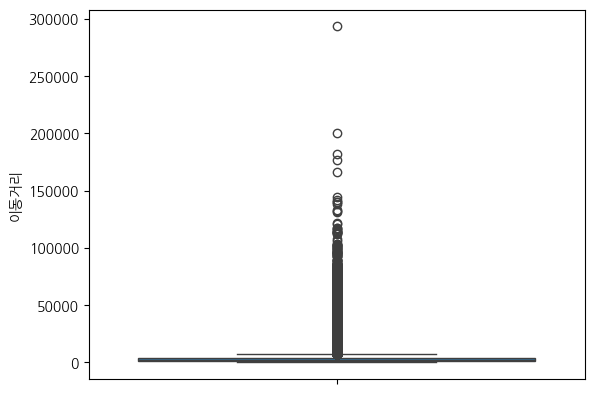

In [88]:
sns.boxplot(y=bicycle['이동거리'])  # Boxplot 그리기

<Axes: ylabel='이동거리'>

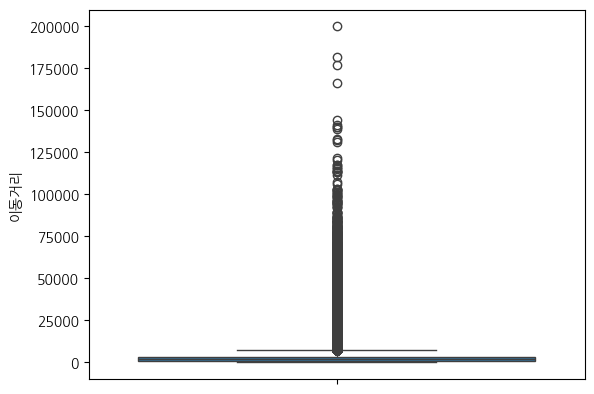

In [13]:
bicycle.drop(bicycle[bicycle.이동거리 >= 250000].index, inplace = True)
sns.boxplot(y=bicycle['이동거리'])

In [90]:
bicycle['연령대'].value_counts()

연령대
20대      1171917
30대       883750
40대       533575
50대       362247
기타        317589
~10대      197802
60대       116448
70대이상      17715
Name: count, dtype: int64

In [14]:
bicycle.drop(bicycle[bicycle.연령대 == '기타'].index, inplace = True)

In [122]:
bicycle.연령대.unique()

array(['~10대', '20대', '30대', '40대', '50대', '60대', '70대이상'], dtype=object)

In [15]:
zero_distance_count = bicycle[bicycle['이동거리'] == 0.0]
print(zero_distance_count)

                 날짜  시간  대여소번호  대여구분코드    연령대  이용건수   운동량   탄소량  이동거리  이용시간
37       2023-04-01   0   2058       0    20대     1  0.00  0.00   0.0     1
90       2023-04-01   0   2615       0    20대     1  0.00  0.00   0.0     2
109      2023-04-01   0   2425       0    20대     1  0.00  0.00   0.0     2
120      2023-04-01   0   2710       0    20대     1  0.00  0.00   0.0     2
184      2023-04-01   0   4522       0    20대     1  0.00  0.00   0.0     2
...             ...  ..    ...     ...    ...   ...   ...   ...   ...   ...
3600942  2023-04-30  23    222       0    30대     1  0.00  0.00   0.0   104
3600957  2023-04-30  23    334       0    40대     1  0.00  0.00   0.0     2
3600961  2023-04-30  23   2185       0    40대     1  0.00  0.00   0.0     2
3600962  2023-04-30  23   2810       0    40대     1  0.00  0.00   0.0     1
3601030  2023-04-30  23   2745       0  70대이상     1  0.00  0.00   0.0     1

[60508 rows x 10 columns]


In [16]:
bicycle.drop(bicycle[bicycle.이동거리 == 0.0].index, inplace = True)

### 단위 변경

In [125]:
bicycle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3222946 entries, 0 to 3601029
Data columns (total 9 columns):
 #   Column  Dtype  
---  ------  -----  
 0   날짜      int32  
 1   시간      int64  
 2   대여구분코드  int64  
 3   연령대     object 
 4   이용건수    int64  
 5   운동량     object 
 6   탄소량     object 
 7   이동거리    float64
 8   이용시간    int64  
dtypes: float64(1), int32(1), int64(4), object(3)
memory usage: 233.6+ MB


In [17]:
bicycle['운동량'] = bicycle['운동량'].str.replace('"','')
bicycle['운동량'] = bicycle['운동량'].astype('float')
bicycle['운동량']

0           13.64
1          120.36
2           23.95
3           40.69
4           41.03
            ...  
3601025     35.48
3601026     26.55
3601027      8.86
3601028     24.71
3601029     21.88
Name: 운동량, Length: 3222946, dtype: float64

In [18]:
bicycle['탄소량'] = bicycle['탄소량'].str.replace('"','')
bicycle['탄소량'] = bicycle['탄소량'].astype('float')
bicycle['탄소량']

0          0.12
1          1.08
2          0.24
3          0.32
4          0.34
           ... 
3601025    0.26
3601026    0.24
3601027    0.07
3601028    0.18
3601029    0.20
Name: 탄소량, Length: 3222946, dtype: float64

In [31]:
bicycle['날짜'] = pd.to_datetime(bicycle['날짜'])

In [32]:
bicycle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3222649 entries, 0 to 3601029
Data columns (total 11 columns):
 #   Column  Dtype         
---  ------  -----         
 0   날짜      datetime64[ns]
 1   시간      int64         
 2   대여소번호   int64         
 3   대여구분코드  int64         
 4   연령대     object        
 5   이용건수    int64         
 6   운동량     float64       
 7   탄소량     float64       
 8   이동거리    float64       
 9   이용시간    int64         
 10  요일      object        
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 295.0+ MB


In [154]:
bicycle_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 4 to 2752
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대여소번호    2749 non-null   float64
 1   자치구      2749 non-null   object 
 2   위도       2749 non-null   float64
 3   경도       2749 non-null   float64
 4   lcd거치대수  2749 non-null   float64
 5   qr거치대수   2749 non-null   float64
 6   총거치대수    2749 non-null   int8   
dtypes: float64(5), int8(1), object(1)
memory usage: 131.7+ KB


In [20]:
bicycle_2['대여소번호'] = pd.to_numeric(bicycle_2['대여소번호'], downcast='integer')
bicycle_2['총거치대수'] = pd.to_numeric(bicycle_2['총거치대수'], downcast='integer')

In [23]:
bicycle_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 4 to 2752
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   대여소번호    2749 non-null   int16  
 1   자치구      2749 non-null   object 
 2   위도       2749 non-null   float64
 3   경도       2749 non-null   float64
 4   lcd거치대수  2749 non-null   float64
 5   qr거치대수   2749 non-null   float64
 6   총거치대수    2749 non-null   int8   
dtypes: float64(4), int16(1), int8(1), object(1)
memory usage: 115.6+ KB


### 대여구분코드 처리

In [156]:
bicycle['대여구분코드'].value_counts()

대여구분코드
0    2614059
1     608590
2        297
Name: count, dtype: int64

In [21]:
bicycle.drop(bicycle[bicycle.대여구분코드 == 2].index, inplace = True)

In [22]:
# 날짜 열을 datetime 형식으로 변환
bicycle['날짜'] = pd.to_datetime(bicycle['날짜'])

# 요일을 한국어로 표시하는 함수
def get_korean_day_of_week(date):
    days = ['월요일', '화요일', '수요일', '목요일', '금요일', '토요일', '일요일']
    return days[date.weekday()]

# 요일을 나타내는 새로운 열 추가
bicycle['요일'] = bicycle['날짜'].apply(get_korean_day_of_week)

# 결과 확인
print(bicycle[['날짜', '요일']])


                날짜   요일
0       2023-04-01  토요일
1       2023-04-01  토요일
2       2023-04-01  토요일
3       2023-04-01  토요일
4       2023-04-01  토요일
...            ...  ...
3601025 2023-04-30  일요일
3601026 2023-04-30  일요일
3601027 2023-04-30  일요일
3601028 2023-04-30  일요일
3601029 2023-04-30  일요일

[3222649 rows x 2 columns]


In [26]:
bicycle.head(5)

날짜  시간  대여소번호  대여구분코드   연령대  이용건수     운동량   탄소량     이동거리  이용시간   요일
0 2023-04-01   0   1668       0  ~10대     1   13.64  0.12   530.00     2  토요일
1 2023-04-01   0   2622       0  ~10대     1  120.36  1.08  4675.83    36  토요일
2 2023-04-01   0   2646       0  ~10대     1   23.95  0.24  1025.12     6  토요일
3 2023-04-01   0   3707       0  ~10대     1   40.69  0.32  1370.00     9  토요일
4 2023-04-01   0    543       0  ~10대     1   41.03  0.34  1480.00     7  토요일

- - -

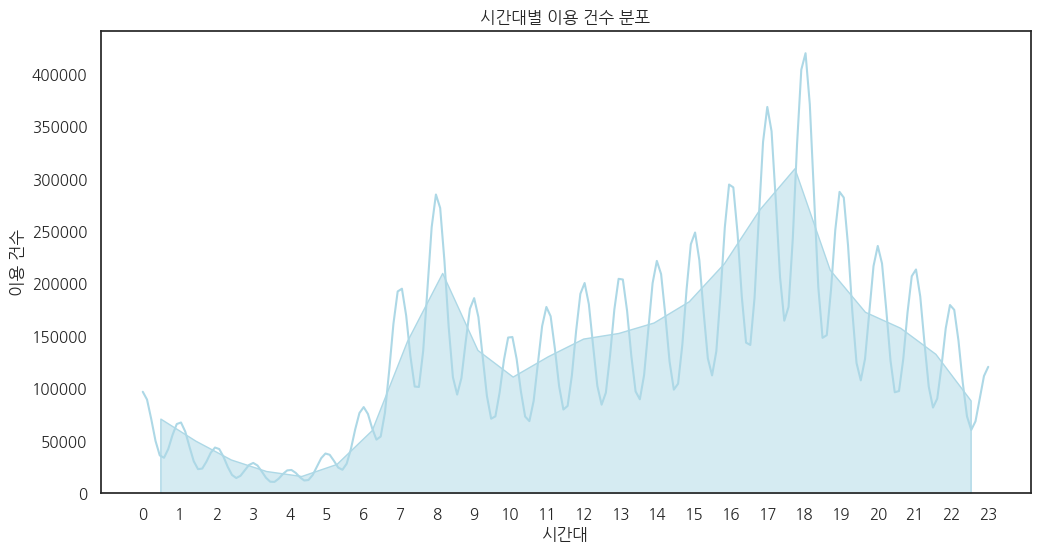

In [73]:
# 시간대별 이용 건수 데이터 생성 (예시 데이터로부터)
data = bicycle[['시간', '이용건수']]

# Seaborn을 사용하여 히스토그램 그리기
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='시간', bins=24, kde=True, color='lightblue', element='poly') 

# x, y 축 레이블 설정
plt.xticks(range(24))
plt.xlabel('시간대')
plt.ylabel('이용 건수')
plt.title('시간대별 이용 건수 분포')

plt.show()


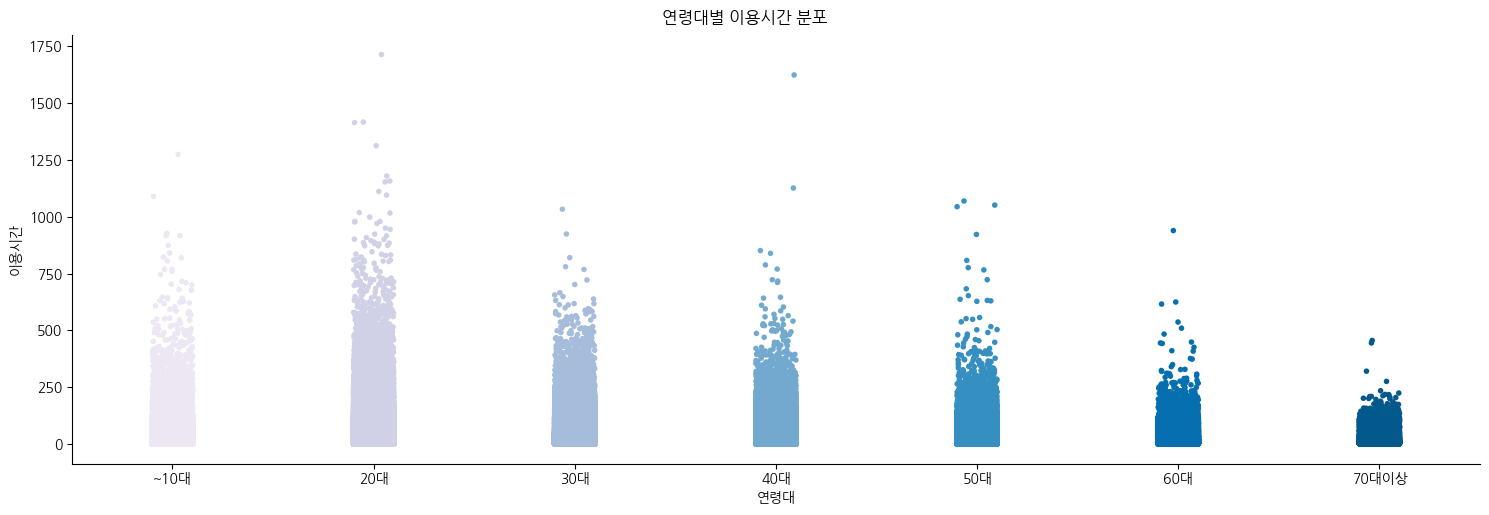

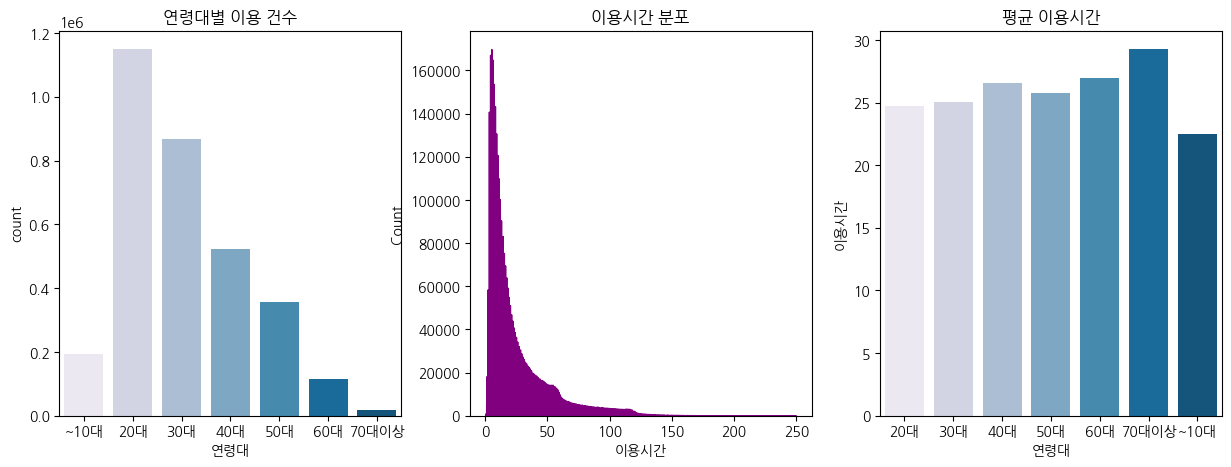

In [240]:
# Catplot 연령대와 이용시간 관련 그래프 그리기
g = sns.catplot(x='연령대', y='이용시간', data=bicycle, size=4, aspect=3, hue='연령대', legend=False, palette='PuBu')
g.fig.suptitle("연령대별 이용시간 분포", y=1.02)


fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))

# Countplot
sns.countplot(x='연령대', data=bicycle, ax=axis1, palette='PuBu', hue='연령대')
axis1.set_title("연령대별 이용 건수")

# Histplot
sns.histplot(x='이용시간', element='poly', data=bicycle, binrange=(0, 250), ax=axis2, color='purple')
axis2.set_title("이용시간 분포")

# Barplot
age_pers = bicycle.groupby(['연령대'], as_index=False)['이용시간'].mean()
sns.barplot(x='연령대', y='이용시간', data=age_pers, ax=axis3, palette='PuBu', hue='연령대', legend=False)
axis3.set_title("평균 이용시간")

plt.show()

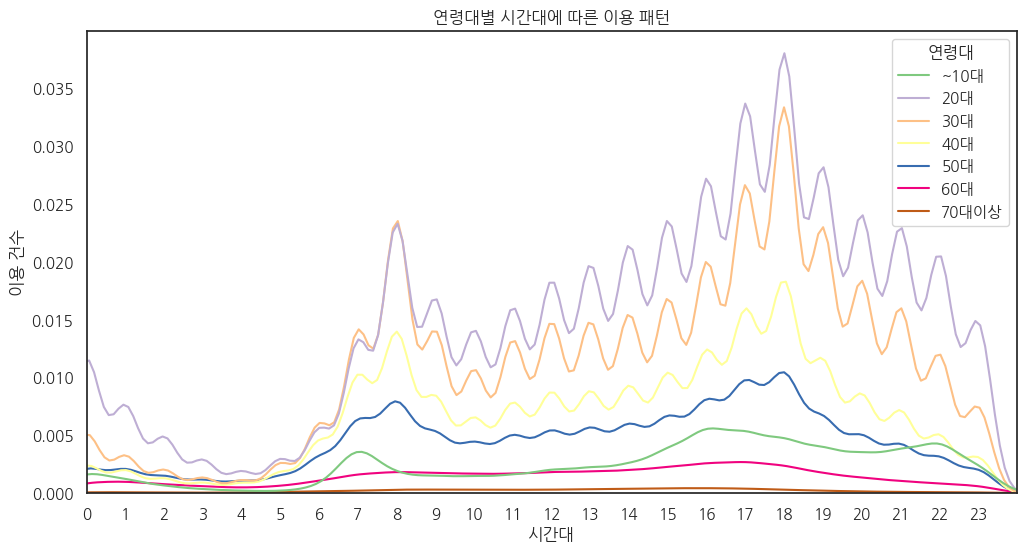

In [75]:
# Seaborn을 사용하여 히스토그램 그리기
plt.figure(figsize=(12, 6))

sns.kdeplot(data=bicycle, x='시간', hue='연령대', fill=False, palette="Accent")


# x, y 축 레이블 설정
plt.xticks(range(24))
plt.xlabel('시간대')
plt.ylabel('이용 건수')
plt.title('연령대별 시간대에 따른 이용 패턴')

# x축 범위 설정
plt.xlim(0, 24)

plt.show()

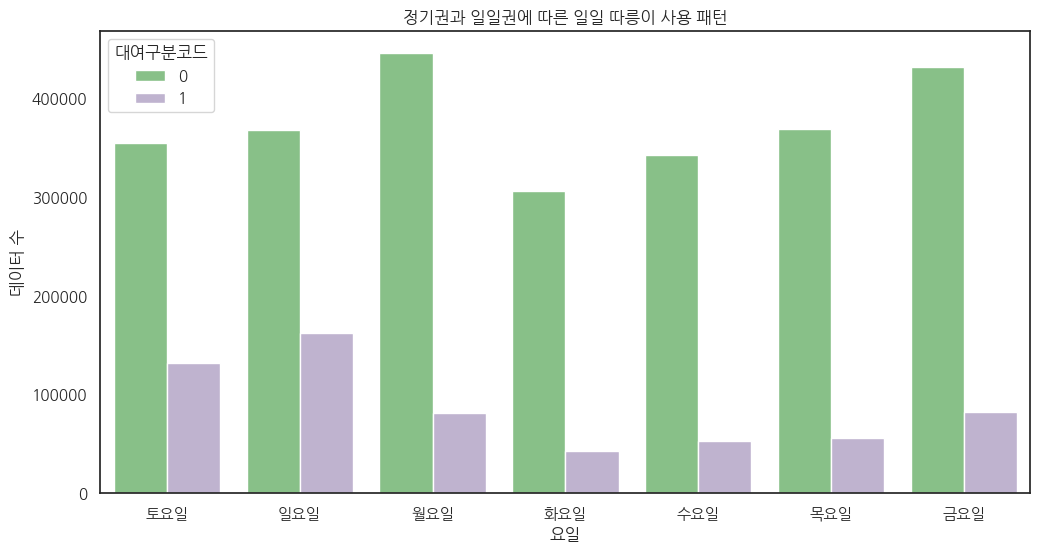

In [104]:
plt.figure(figsize=(12, 6))
sns.countplot(data=bicycle, x='요일', hue='대여구분코드', palette='Accent')
plt.xlabel('요일')
plt.ylabel('데이터 수')
plt.title('정기권과 일일권에 따른 일일 따릉이 사용 패턴')
plt.show()

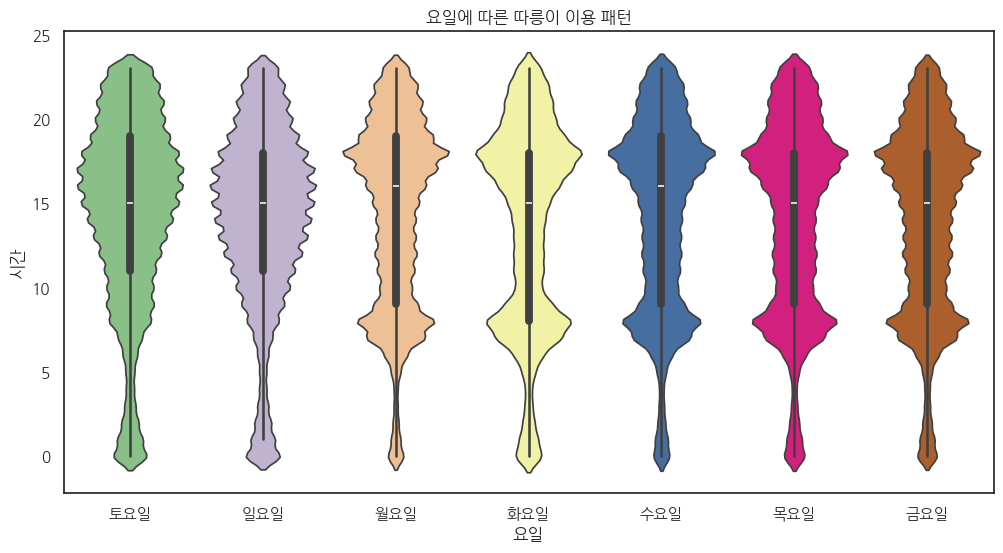

In [109]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=bicycle, x='요일', y='시간', hue='요일', palette='Accent')
plt.xlabel('요일')
plt.ylabel('시간')
plt.title('요일에 따른 따릉이 이용 패턴')
plt.show()

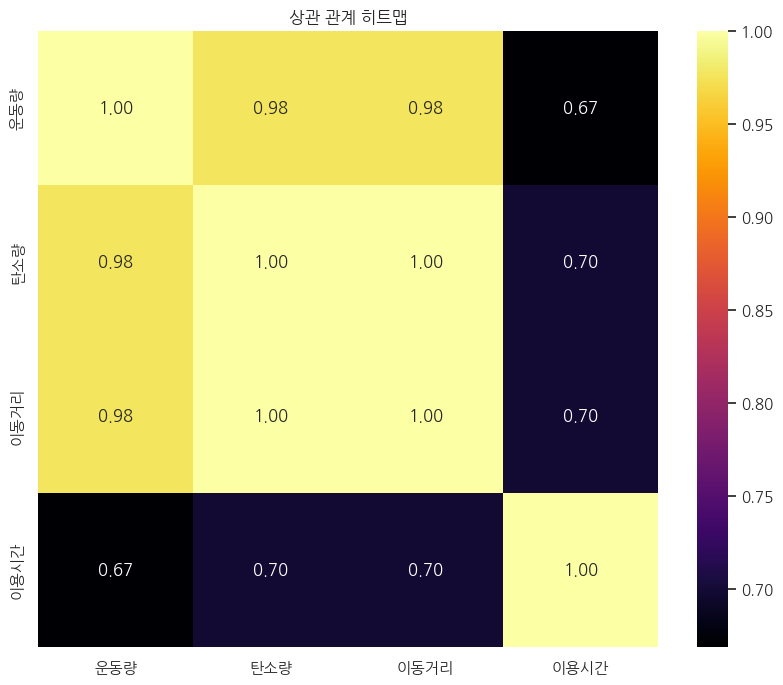

In [170]:
# 선택한 열에 대한 데이터 추출
data = bicycle[['운동량', '탄소량', '이동거리', '이용시간']]

# 상관 행렬 계산
correlation_matrix = data.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".2f")

plt.title('상관 관계 히트맵')
plt.show()


<Figure size 1000x800 with 0 Axes>

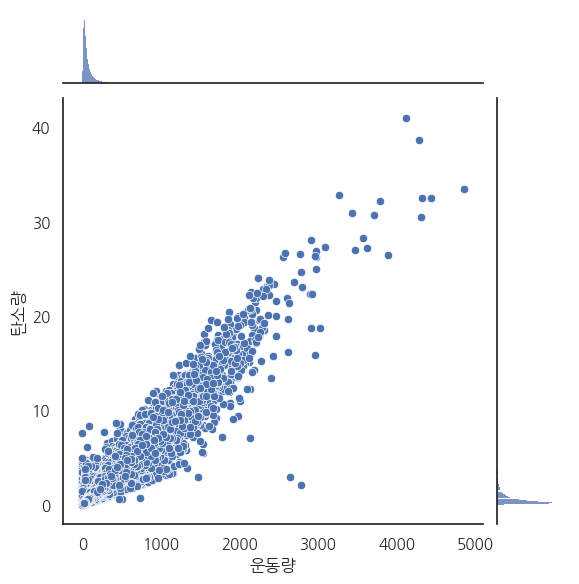

In [108]:
plt.figure(figsize=(10, 8))

sns.jointplot(x='운동량', y='탄소량', data=bicycle)
plt.show()

In [27]:
bicycle_seoul = bicycle_2.groupby("자치구")["총거치대수"].sum().reset_index()
bicycle_seoul = bicycle_2.set_index("자치구")

bicycle_seoul.sort_values(by="총거치대수", ascending=False).head()

대여소번호         위도          경도  lcd거치대수  qr거치대수  총거치대수
자치구                                                      
마포구    186  37.563965  126.898209     40.0    40.0     80
마포구    420  37.566246  126.896179     40.0    37.0     77
강서구   1193  37.559471  126.832077     15.0    51.0     66
용산구    815  37.518509  126.978798     30.0    30.0     60
강서구   2717  37.561337  126.833900      0.0    55.0     55

In [43]:
seoul_boundary = gpd.read_file('./서울시구경계.shp', encoding='cp949')a
seoul_boundary.rename(columns={'SIGUNGU_NM':'구명'}, inplace=True)
boundary = seoul_boundary[['구명', 'geometry']].set_index('구명')

In [29]:
# Create a base map
m = folium.Map(location=[37.58, 127.0], tiles='cartodbpositron', zoom_start=11)

# Add a choropleth map
folium.Choropleth(
    geo_data=boundary['geometry'].geometry.to_crs(epsg=4326).__geo_interface__,
    data=bicycle_seoul["총거치대수"],
    key_on='feature.id',
    fill_color='YlGnBu',
    legend_name='따릉이 거치대 수',
).add_to(m)

# Display the map
m

In [91]:
merged_data = bicycle.merge(bicycle_2[['대여소번호', '자치구']], on='대여소번호', how='left')


# 필요한 열만 선택하여 새로운 DataFrame 생성
rearranged_data = merged_data[['시간', '대여소번호', '연령대', '탄소량', '이동거리', '시간대', '자치구']]
rearranged_data = rearranged_data.drop_duplicates(subset='대여소번호')
# 결과 확인
print(rearranged_data.head())

   시간  대여소번호   연령대   탄소량     이동거리 시간대  자치구
0   0   1668  ~10대  0.12   530.00  새벽  노원구
1   0   2622  ~10대  1.08  4675.83  새벽  송파구
2   0   2646  ~10대  0.24  1025.12  새벽  송파구
3   0   3707  ~10대  0.32  1370.00  새벽  강북구
4   0    543  ~10대  0.34  1480.00  새벽  광진구


In [98]:
# '대여소번호'를 기준으로 'bicycle'과 'bicycle_2' 데이터셋을 조인
merged_data = bicycle.merge(bicycle_2[['대여소번호', '자치구']], on='대여소번호', how='left')

# 필요한 열만 선택하여 새로운 DataFrame 생성
result_data = merged_data[['탄소량', '자치구']]


# Create a base map
m = folium.Map(location=[37.58, 127.0], tiles='cartodbpositron', zoom_start=11)

# Add a choropleth map for carbon emissions
folium.Choropleth(
    geo_data=boundary['geometry'].geometry.to_crs(epsg=4326).__geo_interface__,
    data=merged_data,  # bicycle_seoul 데이터프레임을 사용
    columns=['자치구', '탄소량'],  # '자치구'와 '탄소량' 열을 사용
    key_on='feature.id',
    fill_color='Pastel1',
    legend_name='자치구별 탄소량',
).add_to(m)

# Display the map
m
